## Data

First, load the required packages.

In [1]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel


# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

# NLTK Stop words
#from nltk.corpus import stopwords
#stop_words = stopwords.words('english')
# stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

Load the data and view summaries of the data.

First download the file 'auth_new_edges_x.txt' from https://people.maths.bris.ac.uk/~pr12244/IMCS/

In [61]:
df = pd.read_csv('/Users/samanthawise/Documents/BRISTOL/MASTERS/intro_maths_cyber/problem_class/data/auth_new_edges_x.txt', 
                 error_bad_lines = False) # edit path as see fit

df.columns = ["source_computer", 
              "destination_computer", 
              "time", 
              "source_user@domain", 
              "destination_user@domain", 
              "auth_type", 
              "longon_type", 
              "auth_orien", 
              "success/fail"]

In [62]:
df.head()

,source_computer,destination_computer,time,source_user@domain,destination_user@domain,auth_type,longon_type,auth_orien,success/fail
0,C14046,C754,33492,ANONYMOUS LOGON@C754,ANONYMOUS LOGON@C754,NTLM,Network,LogOn,Success
1,C18769,C754,816792,C18769$@DOM1,C18769$@DOM1,NTLM,Network,LogOn,Success
2,C5808,C18781,1770007,ANONYMOUS LOGON@C18781,ANONYMOUS LOGON@C18781,NTLM,Network,LogOn,Success
3,C13050,C13050,30731,C13050$@DOM1,C13050$@DOM1,?,?,TGT,Success
4,C3632,C1640,306764,C3632$@DOM1,C3632$@DOM1,?,?,TGS,Success


Pre-process the data to extract just the 'usernames' from the 'source_user@domain' column.

In [63]:
users_df = df[df['source_user@domain'].str.contains("U")]
users_df = users_df[-users_df['source_user@domain'].str.contains("ANONYMOUS")]
users_df = users_df[-users_df['destination_computer'].str.contains("U|TGT")]
users_df = users_df[['time', 'destination_computer', 'source_user@domain']]
users_df['source_user@domain'] = users_df['source_user@domain'].str.split('@').str.get(0)

users_df

,time,destination_computer,source_user@domain
8,1254860,C2805,U2552
9,24716,C1877,U2521
26,26627,C2327,U581
31,2981235,C2721,U4995
33,3238561,C1025,U5195
41,2359124,C2058,U2398
43,35124,C743,U6230
44,26344,C2327,U2973
45,726075,C2327,U6239
50,115497,C528,U3174


Summary of how many connections each user made in the dataframe.

In [64]:
users_df['source_user@domain'].value_counts()

U6836     6750
U1653     2849
U7998      815
U1723      483
U66        436
U4281      370
U3771      280
U748       247
U293       242
U463       241
U254       238
U636       231
U737       217
U525       204
U5002      202
U1718      198
U726       195
U307       194
U8849      189
U1430      188
U1916      187
U1592      184
U8601      183
U1522      183
U162       180
U667       176
U12043     173
U194       169
U3635      166
U1506      161
          ... 
U7235        1
U7758        1
U7986        1
U10692       1
U8050        1
U6345        1
U1643        1
U8254        1
U11515       1
U8117        1
U7789        1
U10465       1
U10857       1
U11119       1
U6402        1
U9889        1
U7938        1
U9783        1
U11593       1
U9390        1
U11566       1
U11330       1
U5110        1
U6067        1
U10191       1
U2776        1
U8362        1
U12422       1
U11710       1
U8286        1
Name: source_user@domain, Length: 9964, dtype: int64

How many connections a specific user (e.g. U4281) made to each computer.

In [65]:
users_df[users_df['source_user@domain'].str.contains("U4281")]['destination_computer'].value_counts()

C1152     39
C1877     32
C585      31
C2553     31
C4784     31
C743      30
C3573     30
C4747     24
C2519     16
C2651     14
C1025      7
C625       7
C528       7
C457       6
C586       5
C1065      5
C3173      4
C8799      4
C1640      4
C612       4
C529       4
C467       3
C2106      2
C23055     1
C21318     1
C24306     1
C92        1
C20413     1
C108       1
C26090     1
C22852     1
C423       1
C21592     1
C25828     1
C25483     1
C21718     1
C24432     1
C21109     1
C10        1
C10876     1
C20548     1
C22085     1
C24759     1
C25511     1
C25120     1
C2327      1
C23346     1
C25727     1
C25038     1
C15475     1
C21949     1
C4313      1
C20664     1
Name: destination_computer, dtype: int64

The three selected users we will choose as topics (see Latex report).

In [66]:
users_df1 = users_df[users_df['source_user@domain'].str.contains("U1723|U1653|U66")]

#users_df[users_df['source_user@domain'].str.contains("U66")]['destination_computer'].value_counts()

Disregarding computers that have had less than 5 connections.

In [67]:
users_df1['comp_count'] = users_df1.groupby('destination_computer')['destination_computer'].transform('count')
bots = users_df1[users_df1['comp_count'] >= 5]
comp_num = bots['destination_computer'].nunique()
bots

/Users/samanthawise/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,time,destination_computer,source_user@domain,comp_count
124,2910779,C1025,U6630,56
164,3056451,C5666,U1653,2728
418,116991,C16818,U6631,8
440,2901918,C5666,U1653,2728
466,3110403,C5666,U1653,2728
663,3054865,C5666,U1653,2728
997,3082659,C5666,U1653,2728
1017,687200,C754,U1653,37
1026,3058128,C5666,U1653,2728
1357,1182962,C5666,U1653,2728


## Creating a corpus

Each element represents one day of connections (see Latex report). Each element in 'corpus' represents the list of computers that had connections for each day in the dataframe.

In [68]:
sec_day = 86400 #number of seconds in a day
corpus = []
for i in range(57):
    day = (bots["time"] <= sec_day*(i+1)) & (bots["time"] > sec_day*i)
    list = bots[day][['destination_computer']]
    corpus.append(list)
    
corpus

[       destination_computer
 2654                   C612
 3154                   C625
 3505                   C585
 4492                  C2327
 4792                   C457
 5877                  C1759
 6034                  C2106
 7987                  C1877
 8227                  C1877
 12716                  C585
 13152                 C1877
 13566                 C2327
 14728                 C2327
 15038                 C2327
 15262                  C529
 15473                  C585
 16720                 C2327
 17840                 C2525
 20975                 C2553
 23567                 C1790
 26948                 C1877
 27292                 C2327
 28229                  C743
 28927                  C586
 30832                  C585
 30990                 C2553
 31736                 C2327
 31956                 C5716
 32193                 C1065
 33132                  C585
 ...                     ...
 370360                C2327
 371953                C1015
 372155       

In [69]:
# transform the dataframe into array
users_df_list=[]
for i in range(57):
    a = [x for xs in corpus[i].values for x in xs]
    users_df_list.append(a)

In [70]:
users_df_list

[['C612',
  'C625',
  'C585',
  'C2327',
  'C457',
  'C1759',
  'C2106',
  'C1877',
  'C1877',
  'C585',
  'C1877',
  'C2327',
  'C2327',
  'C2327',
  'C529',
  'C585',
  'C2327',
  'C2525',
  'C2553',
  'C1790',
  'C1877',
  'C2327',
  'C743',
  'C586',
  'C585',
  'C2553',
  'C2327',
  'C5716',
  'C1065',
  'C585',
  'C2553',
  'C1640',
  'C2106',
  'C585',
  'C1056',
  'C743',
  'C2327',
  'C2327',
  'C2106',
  'C625',
  'C2553',
  'C586',
  'C1640',
  'C2327',
  'C2553',
  'C2327',
  'C2553',
  'C2489',
  'C529',
  'C2553',
  'C586',
  'C504',
  'C1640',
  'C2327',
  'C5716',
  'C2327',
  'C2327',
  'C706',
  'C586',
  'C1640',
  'C2327',
  'C585',
  'C1640',
  'C529',
  'C1877',
  'C1003',
  'C1003',
  'C1173',
  'C585',
  'C625',
  'C585',
  'C1640',
  'C528',
  'C585',
  'C2327',
  'C3468',
  'C625',
  'C2327',
  'C2327',
  'C2106',
  'C457',
  'C2162',
  'C586',
  'C423',
  'C743',
  'C529',
  'C528',
  'C1877',
  'C706',
  'C2327',
  'C2327',
  'C2327',
  'C2106',
  'C2327',
 

Now we'll make a dictionary, create a corpus ('corpus1') and report some of the items in it.

In [71]:
#create corpus
id2word = corpora.Dictionary(users_df_list)

texts = users_df_list

corpus1 = [id2word.doc2bow(text) for text in texts]

corpus1

[[(0, 3),
  (1, 7),
  (2, 3),
  (3, 11),
  (4, 3),
  (5, 12),
  (6, 3),
  (7, 4),
  (8, 17),
  (9, 12),
  (10, 3),
  (11, 3),
  (12, 4),
  (13, 4),
  (14, 64),
  (15, 3),
  (16, 4),
  (17, 28),
  (18, 1),
  (19, 4),
  (20, 3),
  (21, 1),
  (22, 1),
  (23, 2),
  (24, 6),
  (25, 4),
  (26, 1),
  (27, 4),
  (28, 9),
  (29, 3),
  (30, 1),
  (31, 11),
  (32, 27),
  (33, 16),
  (34, 12),
  (35, 10),
  (36, 4),
  (37, 27),
  (38, 2)],
 [(3, 3),
  (5, 3),
  (6, 1),
  (7, 3),
  (8, 5),
  (9, 4),
  (14, 3),
  (17, 2),
  (18, 1),
  (21, 1),
  (22, 1),
  (24, 4),
  (25, 5),
  (27, 6),
  (28, 6),
  (30, 1),
  (31, 1),
  (32, 5),
  (33, 4),
  (34, 4),
  (35, 4),
  (37, 6),
  (39, 1),
  (40, 1),
  (41, 2)],
 [(0, 3),
  (2, 2),
  (3, 2),
  (4, 2),
  (5, 2),
  (7, 1),
  (8, 2),
  (9, 3),
  (12, 3),
  (13, 2),
  (14, 1),
  (16, 2),
  (18, 1),
  (20, 1),
  (23, 1),
  (24, 1),
  (25, 2),
  (26, 2),
  (28, 3),
  (29, 2),
  (32, 2),
  (34, 2),
  (36, 1),
  (37, 1),
  (38, 2),
  (40, 2),
  (42, 1),
  (43, 1)

In [72]:
# Showing the names of the computers
[[(id2word[id], freq) for id, freq in cp] for cp in corpus1[:1]]

[[('C1003', 3),
  ('C1015', 7),
  ('C1056', 3),
  ('C1065', 11),
  ('C1173', 3),
  ('C1640', 12),
  ('C1759', 3),
  ('C1790', 4),
  ('C1877', 17),
  ('C2106', 12),
  ('C2162', 3),
  ('C2173', 3),
  ('C231', 4),
  ('C2310', 4),
  ('C2327', 64),
  ('C2489', 3),
  ('C2525', 4),
  ('C2553', 28),
  ('C2651', 1),
  ('C3398', 4),
  ('C3468', 3),
  ('C3699', 1),
  ('C423', 1),
  ('C449', 2),
  ('C457', 6),
  ('C467', 4),
  ('C504', 1),
  ('C528', 4),
  ('C529', 9),
  ('C549', 3),
  ('C5666', 1),
  ('C5716', 11),
  ('C585', 27),
  ('C586', 16),
  ('C612', 12),
  ('C625', 10),
  ('C706', 4),
  ('C743', 27),
  ('C754', 2)]]

## Data Visualisations

Complex Networks example.

In [19]:
import networkx as nx
import collections

In [73]:
# creating the nodes and the edges to build graph

users = bots['destination_computer'].unique()
comps = bots['source_user@domain'].unique()
#bots['connection'] = list(zip(bots['source_user@domain'].tolist(), bots['destination_computer'].tolist())) # create tuples of (user, computer)
connections = set(zip(bots['source_user@domain'].tolist(), bots['destination_computer'].tolist()))

In [74]:
# building the graph - attempt 1

g = nx.Graph()
g.add_nodes_from(users)
g.add_nodes_from(comps)

g.add_edges_from(connections)
print('Number of nodes in graph is {}.'.format(g.number_of_nodes()))
print('Number of edges in graph is {}.'.format(g.number_of_edges()))

Number of nodes in graph is 141.
Number of edges in graph is 608.


In [75]:
links = dict(zip(users, comps))

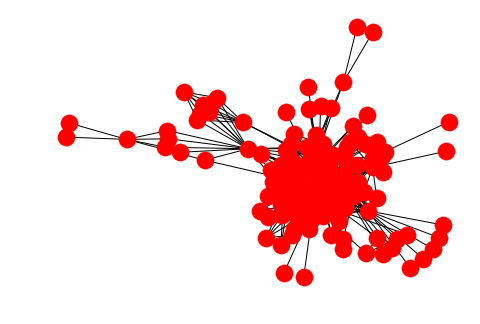

In [76]:
nx.draw(g)

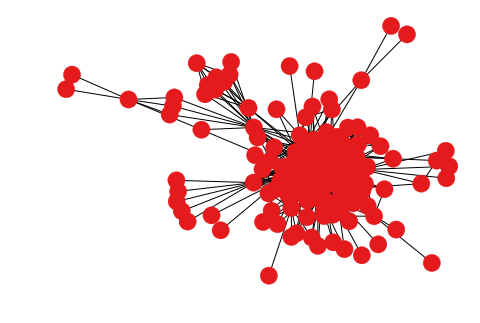

In [77]:
# second attempt

G=nx.from_pandas_edgelist(bots, 'source_user@domain', 'destination_computer', create_using=nx.Graph())
carac = pd.DataFrame({'ID':['U', 'C'], 'myvalue':['group1','group2']})
carac= carac.set_index('ID')
carac=carac.reindex(G.nodes())
carac['myvalue']=pd.Categorical(carac['myvalue'])
carac['myvalue'].cat.codes
nx.draw(G, node_color=carac['myvalue'].cat.codes, cmap=plt.cm.Set1)

Due to time constraints we were unable to colour the nodes according to 'user' and 'destination computer', which would have been useful to better visualise the connection distribution. 

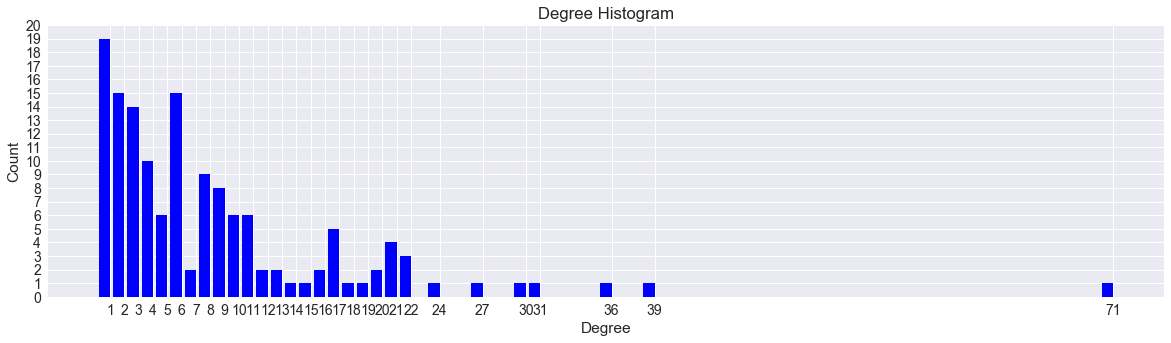

In [92]:
# Degree histogram

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots(figsize = (20,5))
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)
ax.set_yticks(np.linspace(0, 20, num=21))

We can see that most 'users' connect to a single computer (19 users), closely followed by two and five computers (15) and single particular users connecting to 24, 27, 30, 31, 36, 39, 71. 

Heatmap example.

In [46]:
import numpy as np; np.random.seed(0)
freq_list = np.random.rand(58, comp_num)

In [79]:
#create an array to plot heatmap
for i in range(57):
    j = 0
    for k in range(len(corpus1[i])):
        while j < corpus1[i][k][0]:
            freq_list[i][j] = 0
            j += 1
        freq_list[i][j] = np.log(corpus1[i][k][1])
        j += 1
    while j <= comp_num-1:
        freq_list[i][j] = 0
        j += 1     

Text(131,0.5,'documents(days)')

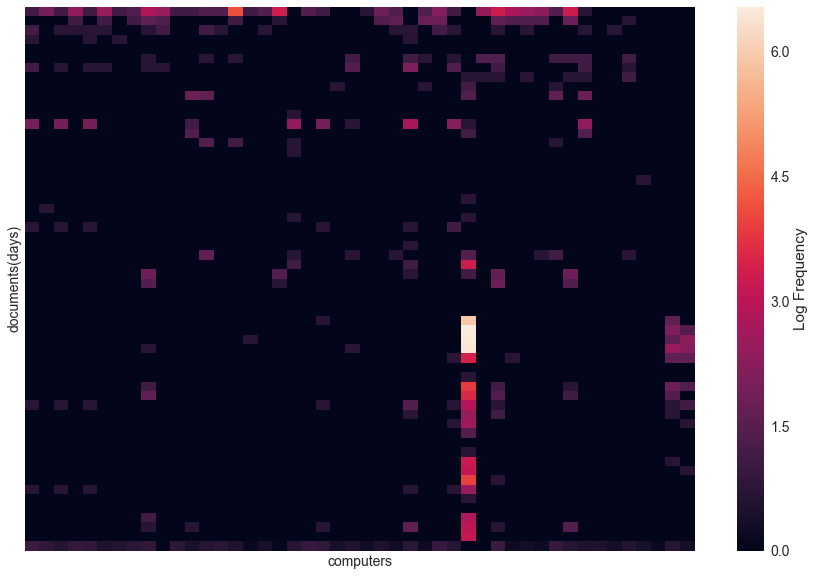

In [80]:
import seaborn as sns; sns.set()
plt.figure(figsize=(15,10))
sns.set(font_scale=1.4)
ax = sns.heatmap(freq_list,xticklabels=False, yticklabels=False, cbar_kws={'label': 'Log Frequency'})
axis_font = {'fontname':'Arial', 'size':'14'}
plt.xlabel('computers',**axis_font)
plt.ylabel('documents(days)',**axis_font)

There is one particular column which is far lighter than the rest and it is most likley to refer to computer 'C5666' as this computer showed to contain the most connections. What is striking in that 4 blocks out of the 58 which have the lightest colours, however without any indication of the timeline it is difficult to determine the reasoning behind this. 

There appears to be more connections at the beginning of our timeline of 58 days demonsrated by the lighter colours in the first row as opposed to the rest of the heat map.

Also, along with the rows containing the lightest colours for computer 'C5666', we can see lighter pinks/purples at the rightmost two columns of the heatmap, which gives more rise to the idea that a particular event happened in those days that caused a higher frequency of authentication events than usual. 

## Building the LDA Model

In [81]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus1,
                                           id2word=id2word,
                                           num_topics=3, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [82]:
#show the topic proportion 
# 0: U66, 1: U1723, 2: U1653

pprint(lda_model.print_topics())

[(0,
  '0.119*"C2327" + 0.095*"C585" + 0.088*"C743" + 0.078*"C1877" + 0.068*"C2553" '
  '+ 0.041*"C586" + 0.036*"C1640" + 0.035*"C2106" + 0.034*"C5716" + '
  '0.033*"C612"'),
 (1,
  '0.118*"C504" + 0.074*"C2651" + 0.069*"C754" + 0.065*"C549" + 0.053*"C1003" '
  '+ 0.049*"C1173" + 0.047*"C1056" + 0.047*"C2173" + 0.044*"C231" + '
  '0.043*"C3468"'),
 (2,
  '0.944*"C5666" + 0.020*"C1025" + 0.015*"C8799" + 0.002*"C549" + '
  '0.001*"C1877" + 0.001*"C423" + 0.001*"C585" + 0.001*"C2327" + 0.001*"C743" '
  '+ 0.001*"C395"')]


Bar plots showing the number of connections a User made to each computer.

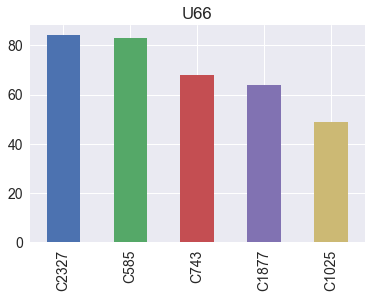

In [83]:
df1 = bots[bots['source_user@domain'].str.contains("U66")]['destination_computer'].value_counts()[:5]
df1.plot.bar(title = "U66")

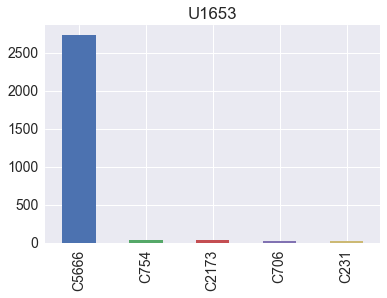

In [84]:
df2 = bots[bots['source_user@domain'].str.contains("U1653")]['destination_computer'].value_counts()[:5]
df2.plot.bar(title = "U1653")

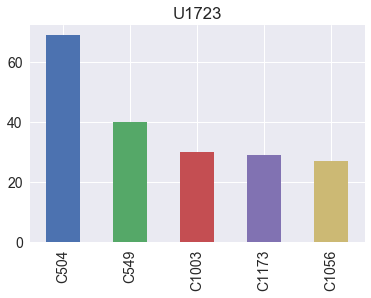

In [85]:
df3 = bots[bots['source_user@domain'].str.contains("U1723")]['destination_computer'].value_counts()[:5]
df3.plot.bar(title = "U1723")

In [54]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus1))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=users_df_list, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

# not very relevant since the 'words' in the documents and not intended to be coherent/perplex.


Perplexity:  -1.3319619447669515

Coherence Score:  0.6964091056550626


In [86]:
# Visualising the topics

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus1, id2word)
vis

/Users/samanthawise/anaconda3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.398054 -0.000059       1        1  71.834312
0      0.199156 -0.135828       2        1  16.067120
1      0.198898  0.135887       3        1  12.098572, topic_info=     Category         Freq    Term        Total  loglift  logprob
term                                                             
30    Default  2703.000000   C5666  2703.000000  30.0000  30.0000
14    Default    86.000000   C2327    86.000000  29.0000  29.0000
26    Default    59.000000    C504    59.000000  28.0000  28.0000
32    Default    82.000000    C585    82.000000  27.0000  27.0000
37    Default    68.000000    C743    68.000000  26.0000  26.0000
8     Default    64.000000   C1877    64.000000  25.0000  25.0000
17    Default    46.000000   C2553    46.000000  24.0000  24.0000
18    Default    39.000000   C2651    39.000000  23.0000  23.0000
38    Default    36.000000    C754    36.000000  22.0000  22.0000
29    Default    40.000000    C549    40.000000  21.0000  21.0000
0     Default    30.000000   C1003    30.000000  20.0000  20.0000
4     Default    28.000000   C1173    28.000000  19.0000  19.0000
11    Default    29.000000   C2173    29.000000  18.0000  18.0000
2     Default    27.000000   C1056    27.000000  17.0000  17.0000
33    Default    28.000000    C586    28.000000  16.0000  16.0000
12    Default    26.000000    C231    26.000000  15.0000  15.0000
20    Default    26.000000   C3468    26.000000  14.0000  14.0000
36    Default    26.000000    C706    26.000000  13.0000  13.0000
5     Default    26.000000   C1640    26.000000  12.0000  12.0000
9     Default    26.000000   C2106    26.000000  11.0000  11.0000
22    Default    25.000000    C423    25.000000  10.0000  10.0000
31    Default    25.000000   C5716    25.000000   9.0000   9.0000
34    Default    27.000000    C612    27.000000   8.0000   8.0000
3     Default    23.000000   C1065    23.000000   7.0000   7.0000
28    Default    21.000000    C529    21.000000   6.0000   6.0000
35    Default    21.000000    C625    21.000000   5.0000   5.0000
41    Default    22.000000     C92    22.000000   4.0000   4.0000
27    Default    19.000000    C528    19.000000   3.0000   3.0000
24    Default    20.000000    C457    20.000000   2.0000   2.0000
25    Default    19.000000    C467    19.000000   1.0000   1.0000
...       ...          ...     ...          ...      ...      ...
0      Topic3    25.595764   C1003    30.618261   1.9329  -2.9305
4      Topic3    23.705601   C1173    28.719360   1.9202  -3.0072
2      Topic3    22.687513   C1056    27.773628   1.9098  -3.0511
12     Topic3    20.996538    C231    26.866396   1.8656  -3.1286
20     Topic3    20.682364   C3468    26.873337   1.8502  -3.1436
29     Topic3    31.009722    C549    40.302673   1.8500  -2.7386
11     Topic3    22.529390   C2173    29.769184   1.8334  -3.0581
36     Topic3    19.843134    C706    26.926252   1.8068  -3.1851
39     Topic3     4.871100  C16818     6.734867   1.7881  -4.5896
22     Topic3    16.574984    C423    25.081194   1.6979  -3.3650
40     Topic3     3.346961   C2331     5.815589   1.5596  -4.9649
41     Topic3    12.529109     C92    22.301161   1.5355  -3.6449
13     Topic3     6.338612   C2310    11.651533   1.5033  -4.3263
43     Topic3     3.250148    C395     6.805443   1.3731  -4.9942
16     Topic3     5.504303   C2525    11.694387   1.3585  -4.4674
23     Topic3     3.848991    C449     9.776228   1.1799  -4.8251
6      Topic3     3.785905   C1759    10.784829   1.0652  -4.8416
25     Topic3     6.165237    C467    19.649529   0.9530  -4.3540
7      Topic3     3.672903   C1790    13.781290   0.7898  -4.8719
24     Topic3     4.794326    C457    20.718763   0.6485  -4.6055
32     Topic3    18.982595    C585    82.877800   0.6382  -3.2294
15     Topic3     1.270700   C2489     6.911586   0.4185  -5.9334
35     Topic3     3.950725    C625    21.761972   0.4058 

The visualisation aboves shows that, as per the paper we studied in this project, that the method was able to detect individual bots as the underlying topics from a topic-modelling perspective.